# Evaluate running time by number of samples

In this tutorial we evaluate the running time of ternadecov for a varying number of samples using the GP trajectory model. The configuration of this tutorial has been set so that it completes in under 5 minutes. In order to generate more interesting plots increase the `n_iters` to 20k and set `n_sample_range` to span the range 500-1000.

In [1]:
# load libraries
import anndata
import matplotlib.pylab as plt
import torch
from ternadecov.time_deconv import *
from ternadecov.simulator import *
from ternadecov.stats_helpers import *
from ternadecov.dataset import *
from ternadecov.deconvolution_plotter import *
from ternadecov.parametrization import *
from ternadecov.evaluation import evaluate_with_trajectory
from ternadecov.deconvolution_writer import DeconvolutionWriter
from ternadecov.deconvolution_exporter import DeconvolutionExporter

## Configure

In [2]:
# number of iterations to run
n_iters = 5_000

# path to single-cell anndata dataset
sc_anndata_path = "/home/nbarkas/disk2/deconvolution_method/datasets/ebov/load_data_python/ebov_sc.h5ad"

In [3]:
with open(sc_anndata_path, 'rb') as fh:
    sc_anndata = anndata.read_h5ad(fh)

## Simulate data

In [4]:
types = DeconvolutionDatatypeParametrization()

Next we generate a 'SingleCellDataset' object. This is a special type of deconvolution dataset object that only contains single-cell data and is used only for simulations.

In [5]:
ebov_sc_dataset = SingleCellDataset(
    sc_anndata, 
    sc_celltype_col="Subclustering_reduced", 
    dtype_np=types.dtype_np, dtype = types.dtype, device=types.device)

Sample a random trajectory of celltypes that will be used for all iterations by only varying the number of samples draw from it


In [6]:
trajectory_coef = sample_trajectories(
    type = 'periodic',
    num_cell_types = ebov_sc_dataset.w_hat_gc.shape[1]
)

In [7]:
n_sample_range = list(range(10,90,20))+list(range(100,1000,200)) 
print(n_sample_range)

[10, 30, 50, 70, 100, 300, 500, 700, 900]


In [8]:
n_samples = []
l1_error_norm = []
fit_time = []


for n in n_sample_range:
    
    eval_result = evaluate_with_trajectory(
        sc_dataset = ebov_sc_dataset, 
        n_samples = n, 
        trajectory_type = 'periodic', 
        trajectory_coef = trajectory_coef,
        n_iters = n_iters,
        types = DeconvolutionDatatypeParametrization(),
        deconvolution_params = {
            'trajectory_model_type': 'gp',
            'hyperparameters': TimeRegularizedDeconvolutionModelParametrization(),
            'trajectory_hyperparameters': TimeRegularizedDeconvolutionGPParametrization(),
        }
    )
    
    n_samples.append(eval_result['n_samples'])
    l1_error_norm.append(eval_result['l1_error_norm'])
    fit_time.append(eval_result['fit_time'])

/home/nbarkas/disk1/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/nbarkas/disk1/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.44106e-10): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


2983 genes selected
[step: 0, time: 1 s ] loss: 318857.12
[step: 1000, time: 14 s ] loss: 232587.94
[step: 2000, time: 27 s ] loss: 189270.65
[step: 3000, time: 41 s ] loss: 172177.17
[step: 4000, time: 54 s ] loss: 166771.14


/home/nbarkas/disk1/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/nbarkas/disk1/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.2013e-10): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


3056 genes selected
[step: 0, time: 1 s ] loss: 987292.43
[step: 1000, time: 16 s ] loss: 689260.68
[step: 2000, time: 32 s ] loss: 560391.30
[step: 3000, time: 47 s ] loss: 507137.19
[step: 4000, time: 63 s ] loss: 488356.32


/home/nbarkas/disk1/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/nbarkas/disk1/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.33856e-10): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


3105 genes selected
[step: 0, time: 1 s ] loss: 1607024.61
[step: 1000, time: 19 s ] loss: 1143708.06
[step: 2000, time: 37 s ] loss: 930685.83
[step: 3000, time: 55 s ] loss: 839948.73
[step: 4000, time: 74 s ] loss: 806818.78


/home/nbarkas/disk1/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/nbarkas/disk1/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.31587e-10): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


3143 genes selected
[step: 0, time: 1 s ] loss: 2336701.00
[step: 1000, time: 21 s ] loss: 1637840.84
[step: 2000, time: 42 s ] loss: 1313826.42
[step: 3000, time: 62 s ] loss: 1186340.73
[step: 4000, time: 83 s ] loss: 1140662.78


/home/nbarkas/disk1/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/nbarkas/disk1/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.27915e-10): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


3176 genes selected
[step: 0, time: 1 s ] loss: 3449919.09
[step: 1000, time: 26 s ] loss: 2377165.59
[step: 2000, time: 51 s ] loss: 1900222.40
[step: 3000, time: 76 s ] loss: 1712169.05
[step: 4000, time: 101 s ] loss: 1645778.51


/home/nbarkas/disk1/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/nbarkas/disk1/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.29993e-10): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


3251 genes selected
[step: 0, time: 1 s ] loss: 10407189.38
[step: 1000, time: 78 s ] loss: 7202534.87
[step: 2000, time: 156 s ] loss: 5788878.75
[step: 3000, time: 233 s ] loss: 5211359.14
[step: 4000, time: 312 s ] loss: 4998428.71


/home/nbarkas/disk1/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/nbarkas/disk1/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.32307e-10): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


3260 genes selected
[step: 0, time: 1 s ] loss: 17112167.40
[step: 1000, time: 116 s ] loss: 11974210.10
[step: 2000, time: 232 s ] loss: 9664693.06
[step: 3000, time: 347 s ] loss: 8702128.97
[step: 4000, time: 464 s ] loss: 8351270.65


/home/nbarkas/disk1/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/nbarkas/disk1/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.30408e-10): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


3249 genes selected
[step: 0, time: 1 s ] loss: 23947811.63
[step: 1000, time: 207 s ] loss: 16772669.62
[step: 2000, time: 413 s ] loss: 13486545.63
[step: 3000, time: 620 s ] loss: 12153806.41
[step: 4000, time: 829 s ] loss: 11650319.40


/home/nbarkas/disk1/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/nbarkas/disk1/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.30656e-10): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


3298 genes selected
[step: 0, time: 1 s ] loss: 30952238.69
[step: 1000, time: 300 s ] loss: 21739736.82
[step: 2000, time: 600 s ] loss: 17492538.29
[step: 3000, time: 900 s ] loss: 15769364.36
[step: 4000, time: 1203 s ] loss: 15126894.97


In [9]:
evaluation_resuts_df = pd.DataFrame({'n_samples':n_samples, 'l1_error_norm': list(x.item() for x in l1_error_norm), 'fit_time': fit_time})

In [10]:
evaluation_resuts_df

,n_samples,l1_error_norm,fit_time
0,10,0.871758,66.451277
1,30,0.869518,78.291943
2,50,0.864875,91.768553
3,70,0.850476,104.141044
4,100,0.859508,126.601906
5,300,0.852567,390.698328
6,500,0.854624,582.720403
7,700,0.848973,1039.847996
8,900,0.853655,1507.635575


In [13]:
evaluation_resuts_df.to_csv('runtime_evaluation_results.csv')

## Plot results

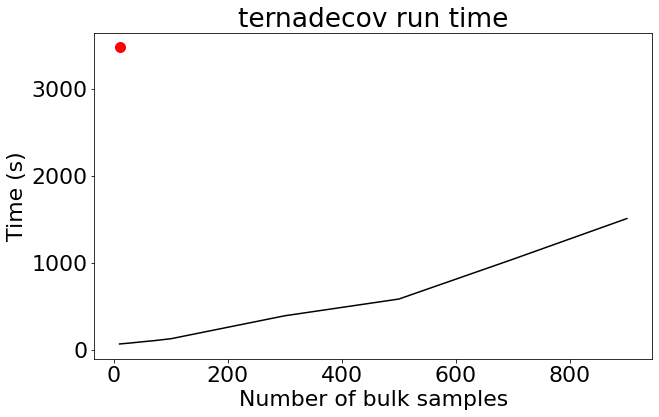

In [22]:
# Plot run-time
plt.figure(figsize=(10, 6))
plt.rcParams.update({'font.size': 22})
plt.plot(evaluation_resuts_df.n_samples.to_numpy(), evaluation_resuts_df.fit_time.to_numpy(), color='black')
plt.plot([10],[3474], color='red', markersize=10, marker='o')
plt.xlabel("Number of bulk samples")
plt.ylabel("Time (s)")
plt.title("ternadecov run time")
plt.show()